# Supervised Learning

- machine learning model identify:
  - patterns and methods
  - learn from them
  - Predicts output

- If any prediction is incorrect, an operator knows to correct it.
- process continues until algorithm achieves the highest accuracy.
---

- Supervised machine learning algorithm includes:
  - Linear and logistic regression
  - Multi-class classification
  - Decision Trees
  - Support Vector Machines

## Example of a supervised machine learning model

- Industrial illustration of a model to determine if an incident is a fire incident or not

- Supervised learning is used to detect:
  - forest fires
  - oil and gas tragedies
  - shipping fires
  - building fires

- Training data to create a **classification model for fire incident detection* includes:
  - area spread of fire
  - smoke levels
  - temperature
  - rate of increase of spread
  - outcome labelled as fire incident or not

- Training data can eliminate false positives like a cooking fire or campfire

- training model helps fire departments classify levels of fire incidents.
- allows department to recognize and classify real life situations and dispatch sufficient resources

- two types of supervised learning algorithms:
  - classification
    - segregates data into two or more categories
    - with one or more inputs, a classification model predicts the value of one or more outcomes
    - example: segregate emails into Spam or Ham
  - regression
    - tries to find relationships between input and output variables
    - suitable for situations where the output variable is a real or continuous value
    - best used to forecast or predict the value of the stock market

## Application

- Supervised learning can optimise and automate processes
  - used in HR operations to find the right candidates for job vacancies
  - used in finance to segregate loans:
    - good loans
    - bad loans
  - seafarers identifies sea level trends using supervised learning

- Examples:
1. Quality inspection in manufacturing
  - classification in grades
  - Detect level of damage in products - classification of damage
  - different labels that are being classified
2. Forecasting for the maritime industry
  - global supply chain depend on maritime industry
  - anything that impact this, impacts global trade (2021 - Suez canal blocked)
  - forecasting using supervised learning is possible based on a combination of:
    - historic events
    - weather conditions
  - this helps us develop a precautionary incident management
    - for example, a regression model developed with supervised learning:
      - help to predict the wind impact on ships
    - predict tidal currents based on past data
    - forecast demand supply based on past consumer records - help to reduce losses
3. Fraud protection measures
  - email clients mark mails as spam with the help of a learning model
  - supervised learning models are trained to detect and prevent large scale fraud. The model learns from:
    - financial transactions with fraud patterns
    - cyber attacks on servers
    - fake social media profiles
4. Waste management
  - Supervised management - classifies waste into dry, wet waste and e-waste
    - improves composting activities and ptiise e-waste recycling
  - help climate focused companies





## Preparing and shaping data

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df['Travelalone'] = np.where((df['SibSp'] + df['Parch']) > 0, 0, 1).astype('uint8')

In [7]:
df1 = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1)

In [8]:
df1.isna().sum()

Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Embarked         2
Travelalone      0
dtype: int64

In [9]:
# df1['Age'].fillna(df1['Age'].median(skipna=True), inplace=True) # it gives a worning
df1['Age'] = df1['Age'].fillna(df1['Age'].median(skipna=True))
df1['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [10]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Travelalone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [11]:
df_titanic = pd.get_dummies(df1, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

In [12]:
df_titanic.head()

,Survived,Age,Fare,Travelalone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,False,True,True,False,True
1,1,38.0,71.2833,0,False,False,False,False,False
2,1,26.0,7.9250,1,False,True,False,False,True
3,1,35.0,53.1000,0,False,False,False,False,True
4,0,35.0,8.0500,1,False,True,True,False,True


In [13]:
X = df_titanic.drop(['Survived'], axis=1)
y = df_titanic['Survived']

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [15]:
trans_MM = MinMaxScaler()
trans_SS = StandardScaler()

In [16]:
df_MM = trans_MM.fit_transform(X)
df_SS = trans_SS.fit_transform(X)

In [17]:
pd.DataFrame(df_MM, columns=X.columns)

,Age,Fare,Travelalone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,1.0,0.0,1.0
1,0.472229,0.139136,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.015469,1.0,0.0,1.0,0.0,0.0,1.0
3,0.434531,0.103644,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,1.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,1.0,1.0,0.0,1.0,0.0,1.0
887,0.233476,0.058556,1.0,0.0,0.0,0.0,0.0,1.0
888,0.346569,0.045771,0.0,0.0,1.0,0.0,0.0,1.0
889,0.321438,0.058556,1.0,0.0,0.0,1.0,0.0,0.0


In [18]:
pd.DataFrame(df_SS, columns=X.columns)

,Age,Fare,Travelalone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,-0.565736,-0.502445,-1.231645,-0.510152,0.902587,0.737695,-0.307562,0.619306
1,0.663861,0.786845,-1.231645,-0.510152,-1.107926,-1.355574,-0.307562,-1.614710
2,-0.258337,-0.488854,0.811922,-0.510152,0.902587,-1.355574,-0.307562,0.619306
3,0.433312,0.420730,-1.231645,-0.510152,-1.107926,-1.355574,-0.307562,0.619306
4,0.433312,-0.486337,0.811922,-0.510152,0.902587,0.737695,-0.307562,0.619306
...,...,...,...,...,...,...,...,...
886,-0.181487,-0.386671,0.811922,1.960202,-1.107926,0.737695,-0.307562,0.619306
887,-0.796286,-0.044381,0.811922,-0.510152,-1.107926,-1.355574,-0.307562,0.619306
888,-0.104637,-0.176263,-1.231645,-0.510152,0.902587,-1.355574,-0.307562,0.619306
889,-0.258337,-0.044381,0.811922,-0.510152,-1.107926,0.737695,-0.307562,-1.614710


# Overfitting and Underfitting
- Defines how machine learning models are learning and applying what they learned
- **bias** - an error introduced in the model
  - *high bias* - big difference between the actual and predicted values. That's not good for our model
  - *low bias* - the difference between the actual and predicted values is low.
- **variance** - indicates how scattered data is.
  - *high variance* - more scattered data
  - *low variance* - less scattered data

- **Overfit** - indicates a low bias and high variance in the data.
  - happens when a model focuses on too many details in the training dataset
  - negative impact on the performance of the model on a new dataset
  - *example* - trained machine learning model which predicts only-2 degree climate change is considered overfit. The model will not consider any other temperature.
- **Underfitting** - high bias and high variance in the data
  - easily detectable as it exhibit poor performance on the training dataset
  - a model is underfit if it is trained with limited features like temperature and wind speed. Model will not encounter other climate conditions like rain or snow.

### Models according to performance
1. **Good model**
  - if performes well on _training_ and _testing data_.
2. **Overfit**
  - performes well with training data, but not with testing data
3. **Underfit**
  - doesn't perform well on training and testing data
---


In [19]:
# Detecting and preventing overfitting and underfitting
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

In [20]:
X, y = make_classification(n_samples=9000, n_features=18, n_informative=4, n_redundant=12, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
train_scores, test_scores = [],[]
values = [i for i in range(1, 21)]

In [22]:
for i in values:
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train, y_train)
  train_vhat = model.predict(X_train)
  train_acc = accuracy_score(y_train, train_vhat)
  test_vhat = model.predict(X_test)
  test_acc = accuracy_score(y_test, test_vhat)
  train_scores.append(train_acc)
  test_scores.append(test_acc)
  print(f">{i} {train_acc=:.3f} {test_acc=:.3f}")

>1 train_acc=0.834 test_acc=0.841
>2 train_acc=0.847 test_acc=0.859
>3 train_acc=0.867 test_acc=0.876
>4 train_acc=0.900 test_acc=0.894
>5 train_acc=0.917 test_acc=0.908
>6 train_acc=0.934 test_acc=0.920
>7 train_acc=0.959 test_acc=0.934
>8 train_acc=0.972 test_acc=0.940
>9 train_acc=0.977 test_acc=0.938
>10 train_acc=0.981 test_acc=0.940
>11 train_acc=0.987 test_acc=0.939
>12 train_acc=0.991 test_acc=0.938
>13 train_acc=0.993 test_acc=0.935
>14 train_acc=0.995 test_acc=0.933
>15 train_acc=0.995 test_acc=0.931
>16 train_acc=0.997 test_acc=0.930
>17 train_acc=0.997 test_acc=0.932
>18 train_acc=0.998 test_acc=0.928
>19 train_acc=0.999 test_acc=0.929
>20 train_acc=1.000 test_acc=0.929


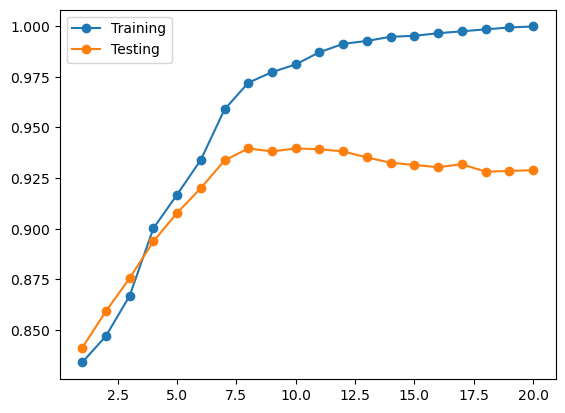

In [23]:
plt.plot(values, train_scores, '-o', label='Training')
plt.plot(values, test_scores, '-o', label='Testing')
plt.legend()
plt.show()

## Preventing overfitting
- increase training set
- remove unwanted attributes
- regularization and boosting

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, 20], 'min_samples_split': [5, 10, 20, 50, 100]}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, n_jobs=-1, scoring='accuracy')  # cv - cross validation
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [26]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=5)

In [27]:
print(accuracy_score(y_train, clf.best_estimator_.predict(X_train)))
print(accuracy_score(y_test, clf.best_estimator_.predict(X_test)))

0.9974603174603175
0.9366666666666666


- we can see that for the **sample 10**:
  - `10 train_acc=0.978 test_acc=0.944`
  - the difference was around **4%**
- now, with *best_estimator_*
  ```
  0.9747619047619047
  0.9422222222222222
  ```
  - the difference has now reduced, but we have to fine tune it more, so that the difference would be as close as possible



## Regularization
- is a form of regression that shrinks coeffieicent towards Zero
- reduces the variance of the model, without increase in bias.
- discourages more complex models and prevents overfitting

- fitting involces a loss function and known as residual sum of squares (RSS).
  - RSS is the difference between the actual and predicted value
  - RSS equation:
$$RSS = \sum_{i=1}^n \left(y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij}\right)^2$$
    - y is the independent variable
    - $\beta$ is the Regression coefficient value
    - X is the dependent variable

## Types of Regularization
### 1. Dropout Regularization

- the more units dropped out, the stronger is regularization.
  - good for training neural networks

### 2. Early Stopping

- uses large number of epochs and plot the validation loss graph
- stop training and save the model when the validation loss moves from decreasing to increasing

### 3. Co-adaptation
- neuron predict patterns in the training data using output of specific neurons.
- if the validation data does not have patterns that cause co-adaptation, it could cause overfitting.
- dropout regularization reduces co-adaptation
  - it ensures neurons cannot rely solely on other neurons.

### 4. Lasso Regression - L1
- Lasso regression (L1 regularisation) penalizes weights in proportion to the sum of the absolute values of the weights
- drives the weights of irrelevant or barely relevant features to exactly zero

### 5. Ridge Regression
- Ridge regression or L2 regularisazion shrinks coefficients close to zero for unimportant predictors
- it will never make them exactly zero
  - the final model will include all predictors